In [1]:
!pip install tensorflow==2.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 516.3 MB 3.6 kB/s 
     |████████████████████████████████| 3.0 MB 42.1 MB/s 
     |████████████████████████████████| 454 kB 74.0 MB/s 
     |████████████████████████████████| 2.9 MB 57.1 MB/s 
     |████████████████████████████████| 26.0 MB 45.5 MB/s 
     |████████████████████████████████| 152 kB 79.9 MB/s 
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.2.0
    Uninstalling cachetools-5.2.0:
      Successfully uninstalled cachetools-5.2.0
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.15.0
    Uninstalling google-auth-2.15.0:
      Successfully uninstalled google-auth-2.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0


In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.losses import categorical_crossentropy,binary_crossentropy


In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
batch_size = 32
num_classes = 10
epochs = 50
y_train = y_train.flatten()
y_test = y_test.flatten()

170500096/170498071 [==============================] - 14s 0us/step


In [3]:
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test=x_test / 255.0
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])
filepath='weights0.{epoch:02d}-{val_loss:.2f}.hdf5'
CB=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [5]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,callbacks=[CB],validation_split=0.2)

Epoch 1/50
1250/1250 [==============================] - 148s 118ms/step - loss: 1.6864 - acc: 0.3832 - val_loss: 1.2725 - val_acc: 0.5489
Epoch 2/50
1250/1250 [==============================] - 145s 116ms/step - loss: 1.3073 - acc: 0.5336 - val_loss: 1.0617 - val_acc: 0.6260
Epoch 3/50
1250/1250 [==============================] - 150s 120ms/step - loss: 1.1444 - acc: 0.5931 - val_loss: 0.9537 - val_acc: 0.6637
Epoch 4/50
1250/1250 [==============================] - 152s 121ms/step - loss: 1.0453 - acc: 0.6321 - val_loss: 0.8941 - val_acc: 0.6832
Epoch 5/50
1250/1250 [==============================] - 149s 119ms/step - loss: 0.9842 - acc: 0.6564 - val_loss: 0.8840 - val_acc: 0.6857
Epoch 6/50
1250/1250 [==============================] - 150s 120ms/step - loss: 0.9330 - acc: 0.6704 - val_loss: 0.8660 - val_acc: 0.7064
Epoch 7/50
1250/1250 [==============================] - 150s 120ms/step - loss: 0.8988 - acc: 0.6851 - val_loss: 0.7929 - val_acc: 0.7219
Epoch 8/50
1250/1250 [============

313/313 - 14s - loss: 0.6696 - acc: 0.7816


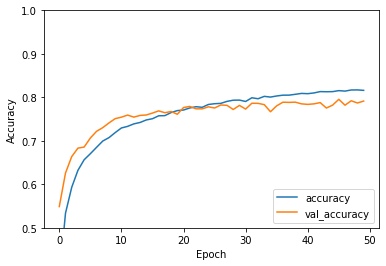

In [6]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

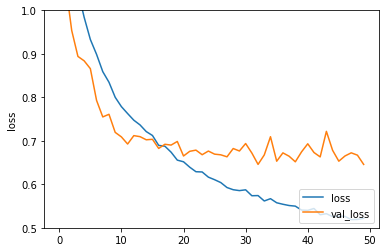

In [8]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.ylabel('loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [11]:
from sklearn.metrics import confusion_matrix
y_prediction = model.predict(x_test)
y_prediction = np.argmax (y_prediction, axis = 1)
Test_pred=np.argmax(y_test, axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(Test_pred, y_prediction , normalize='pred')

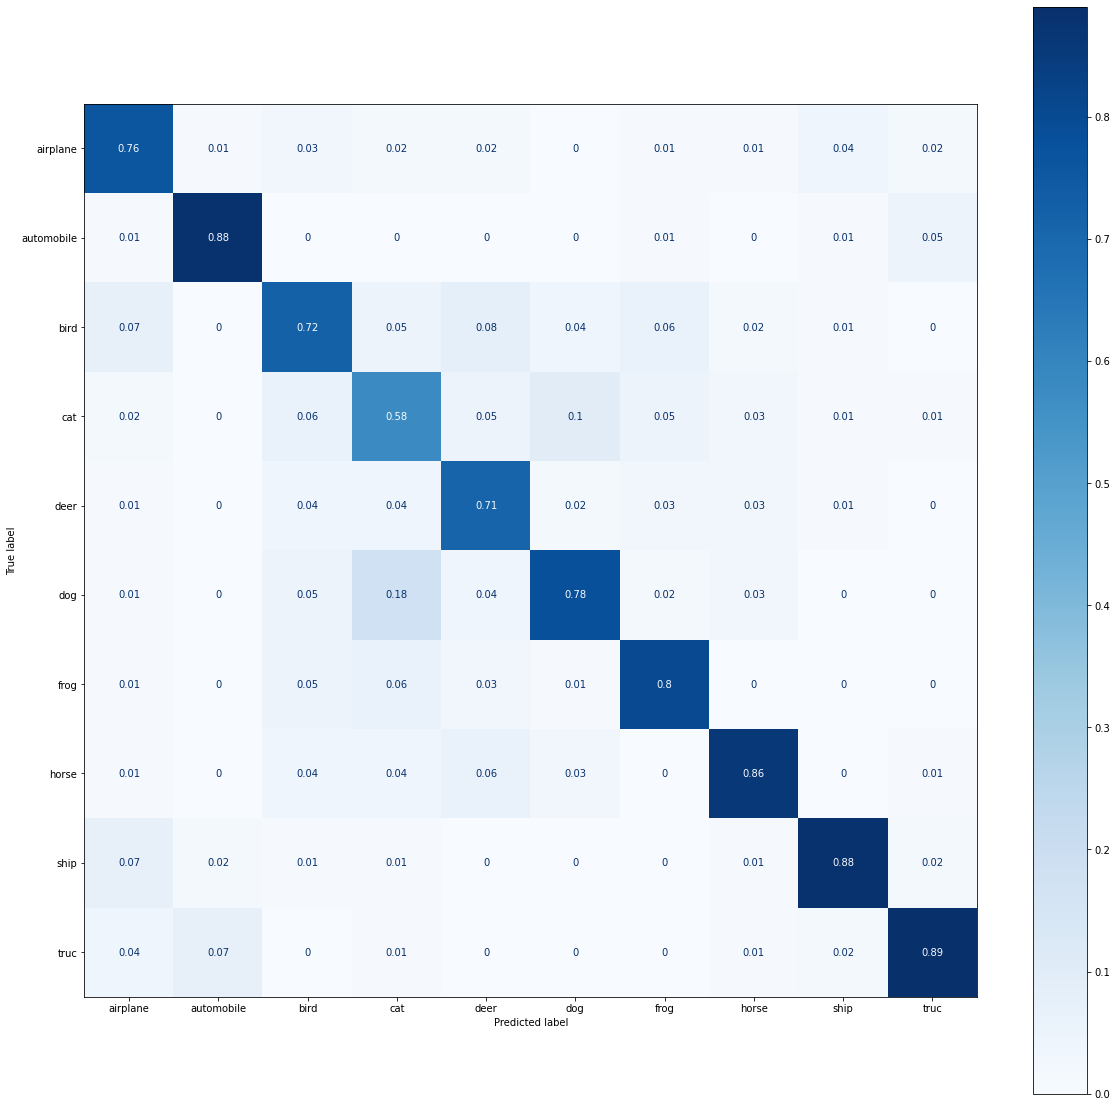

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
result = np.round_(result,decimals=2)
labels=['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truc']
disp = ConfusionMatrixDisplay(confusion_matrix=result, display_labels=labels)
plt.rcParams["figure.figsize"] = (20,20)
disp.plot(cmap=plt.cm.Blues)
plt.show()